In [8]:
from utils.tools import *

In [9]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_2_60.mpt']

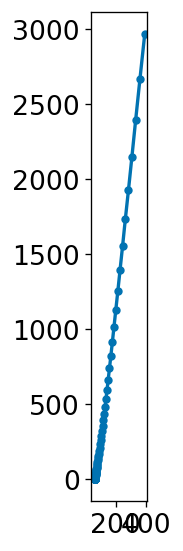

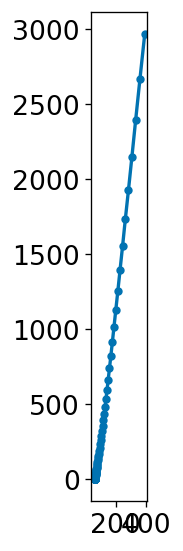

In [10]:
mpt_data = importer(path, data, 10**6, 10**1.5)[0]

df = importer(path, data, 10**6, 10**1.5)[1]

In [4]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#mpt_data.df[0].keys()
mpt_data.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 180
    # variables        = 7
    chi-square         = 1.0814e+08
    reduced chi-square = 625068.900
    Akaike info crit   = 2409.07134
    Bayesian info crit = 2431.42204
[[Variables]]
    Rs:   575.471757 +/- 388.110565 (67.44%) (init = 1000)
    R:    1612.85227 +/- 867.064601 (53.76%) (init = 2959)
    n:    0.66243166 +/- 0.28821700 (43.51%) (init = 0.8)
    fs:   2153.60725 +/- 3575.55241 (166.03%) (init = 23023)
    R2:   280838.573 +/- 55897449.8 (19903.77%) (init = 258738)
    n2:   0.97725081 +/- 0.95755961 (97.99%) (init = 0.8)
    fs2:  0.21401566 +/- 43.8431460 (20485.95%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.963
    C(R2, n2)  = -0.962
    C(R, n)    = -0.896
    C(R, n2)   =  0.813
    C(Rs, n)   =  0.763
    C(R, fs)   = -0.746
    C(fs, n2)  = -0.745
    C(Rs, R)   = -0.717
    C(R, fs2)  

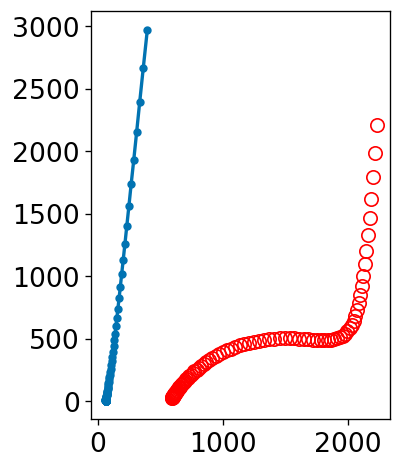

In [5]:
mpt_data.mpt_plot(fitting = 'on')

In [6]:
#FIRST BATCH OF FITTED COEFFICIENTS, PLUG BACK INTO THE GUESS FUNCTION TO GET EVEN BETTER BATCH

print(mpt_data.fit_Rs)
print()
print(mpt_data.fit_R)
print(mpt_data.fit_n)
print(mpt_data.fit_fs)
print()
print(mpt_data.fit_R2)
print(mpt_data.fit_n2)
print(mpt_data.fit_fs2)

[575.4717565224721]

[1612.8522665554922]
[0.6624316603886105]
[2153.607251050765]

[280838.5725767624]
[0.9772508069631436]
[0.21401565761348718]


In [4]:
guess_package = [mpt_data.fit_Rs[0], mpt_data.fit_R[0], mpt_data.fit_n[0], mpt_data.fit_fs[0], mpt_data.fit_R2[0], mpt_data.fit_n2[0], mpt_data.fit_fs2[0]]
guess_package

AttributeError: 'mpt_data' object has no attribute 'fit_Rs'

In [8]:
new_guess_package = [i for i in guess(mpt_data, guess_package)]
new_guess_package

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7756
    # data points      = 180
    # variables        = 7
    chi-square         = 4.58334036
    reduced chi-square = 0.02649330
    Akaike info crit   = -646.695181
    Bayesian info crit = -624.344483
[[Variables]]
    Rs:   59.3573173 +/- 0.74609548 (1.26%) (init = 575.4718)
    R:    719.661178 +/- 5910.02656 (821.22%) (init = 1612.852)
    n:    0.65000000 +/- 0.38990485 (59.99%) (init = 0.6624317)
    fs:   10.2680985 +/- 87.3684142 (850.87%) (init = 2153.607)
    R2:   207888.848 +/- 1104748.43 (531.41%) (init = 280838.6)
    n2:   0.97914483 +/- 0.18447424 (18.84%) (init = 0.9772508)
    fs2:  0.39041092 +/- 2.29486112 (587.81%) (init = 0.2140157)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n, n2)   = -0.986
    C(R, fs)   = -0.862
    C(Rs, n)   = -0.785
    C(R, n)    = -0.778
    C(Rs, n2)  =  0.762
    C(R, n2)   =  0.674
    C(fs, R2)  = -0.663
    C(fs

[59.357317328691884,
 719.6611775966196,
 0.6500000002239006,
 10.26809847763215,
 207888.8482078446,
 0.9791448278911984,
 0.3904109249707523]

In [9]:
thresh_verif(guess_package, new_guess_package)

76502.20319201548


False

In [10]:
new_new_guess_package = guess(mpt_data, new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 180
    # variables        = 7
    chi-square         = 4.58334036
    reduced chi-square = 0.02649330
    Akaike info crit   = -646.695181
    Bayesian info crit = -624.344483
[[Variables]]
    Rs:   59.3573173 +/- 0.74591298 (1.26%) (init = 59.35732)
    R:    719.661178 +/- 5924.52534 (823.24%) (init = 719.6612)
    n:    0.65000000 +/- 0.40904562 (62.93%) (init = 0.65)
    fs:   10.2680985 +/- 87.6397544 (853.51%) (init = 10.2681)
    R2:   207888.848 +/- 1099759.61 (529.01%) (init = 207888.8)
    n2:   0.97914483 +/- 0.18332347 (18.72%) (init = 0.9791448)
    fs2:  0.39041092 +/- 2.28358351 (584.92%) (init = 0.3904109)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n, n2)   =  0.986
    C(R, fs)   = -0.865
    C(Rs, n)   =  0.785
    C(R, n)    =  0.779
    C(Rs, n2)  =  0.761
    C(R, n2)   =  0.674
    C(fs, R2)  = -0.666
    C(fs, fs2) =

In [13]:
thresh_verif(new_guess_package, new_new_guess_package)

2.8819613362429664e-11


True

In [14]:
#CUMULATION OF THE FUNCTIONS FROM ABOVE

#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
guesser(mpt_data, Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3421
    # data points      = 180
    # variables        = 7
    chi-square         = 4.58314809
    reduced chi-square = 0.02649219
    Akaike info crit   = -646.702732
    Bayesian info crit = -624.352034
[[Variables]]
    Rs:   59.3556914 +/- 0.75770469 (1.28%) (init = 40)
    R:    654.585681 +/- 5322.51782 (813.11%) (init = 2959)
    n:    0.65000000 +/- 0.39562419 (60.87%) (init = 0.8)
    fs:   11.9281008 +/- 87.8611214 (736.59%) (init = 23023)
    R2:   162010.083 +/- 630903.722 (389.42%) (init = 258738)
    n2:   0.97998772 +/- 0.19996921 (20.41%) (init = 0.8)
    fs2:  0.50731443 +/- 2.23040930 (439.65%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.998
    C(n, n2)   = -0.993
    C(R, fs)   = -0.865
    C(R, n)    = -0.854
    C(R, n2)   =  0.799
    C(Rs, n)   = -0.790
    C(Rs, n2)  =  0.774
    C(n2, fs2) =  0.622
    C(Rs, R)   =  0.620
    C(R2, n2)  = 

[59.355691365214724,
 654.5856813555592,
 0.6500000009303469,
 11.928100805680375,
 162010.08331766332,
 0.9799877240061323,
 0.5073144256224087]